In [289]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [290]:
# directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_15-16/20250615_185919'
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_16-17/20250617_104018'
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_15-16/20250616_081345'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt


In [291]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_REC_minus'),
 'CLIP_EPS': 0.2,
 'ENT_COEF': 0

In [292]:
world_metadata

WorldMetadata(world_train={'num_passive_houses': 1, 'step': 3600, 'termination': {'max_iterations': None, 'min_soh': 0.6}, 'reward': {'trading_coeff': 1, 'operational_cost_coeff': 0, 'degradation_coeff': 1, 'clip_action_coeff': 1, 'glob_coeff': 1}, 'aging_options': {'degradation': True, 'fading': False}, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'use_reward_normalization': False, 'valorization_incentive_coeff': 8e-06, 'incentivizing_tariff_coeff': 8e-05, 'incentivizing_tariff_max_variable': 4e-05, 'incentivizing_tariff_baseline_variable': 0.00018, 'fairness_coeff': 0.0, 'smoothing_factor_rec_a

In [293]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

In [294]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43800, 3),
 'actions_rec': (22, 43800, 3),
 'balance_minus': (22, 43800),
 'balance_plus': (22, 43800),
 'buy_prices': (22, 43800, 3),
 'demands': (22, 43800, 3),
 'dones': {'REC_agent': (22, 43800),
  '__all__': (22, 43800),
  'battery_agent_0': (22, 43800),
  'battery_agent_1': (22, 43800),
  'battery_agent_2': (22, 43800)},
 'energy_to_batteries': (22, 43800, 3),
 'generations': (22, 43800, 3),
 'norm_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': (22, 43800, 3),
  'r_glob': (22, 43800, 3),
  'r_op': (22, 43800, 3),
  'r_trad': (22, 43800, 3)},
 'pure_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': (22, 43800, 3),
  'r_glob': (22, 43800, 3),
  'r_op': (22, 43800, 3),
  'r_trad': (22, 43800, 3)},
 'r_tot': (22, 43800, 3),
 'rec_reward': (22, 43800),
 'self_consumption': (22, 43800),
 'sell_prices': (22, 43800, 3),
 'soc': (22, 43800, 3),
 'soh': (22, 43800, 3),
 'tot_incentives': (22, 43800),
 'weig_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': 

In [295]:
val_info['actions_rec']

array([[[0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334],
        ...,
        [0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334]],

       [[0.        , 0.99999994, 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        ...,
        [0.        , 0.        , 1.0000001 ],
        [0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334]],

       [[1.        , 0.        , 0.        ],
        [0.33333334, 0.33333334, 0.33333334],
        [0.01593458, 0.9840654 , 0.        ],
        ...,
        [0.        , 0.03300177, 0.9669982 ],
        [0.        , 0.58119273, 0.41880733],
        [0.        , 0.36962712, 0.6303729 ]],

       ...,

       [[0.        , 0.9900504 , 0.00994958],
        [0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0

In [296]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43800, 3)

In [297]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-3872.0989, -2992.9563, -2609.964 , -2467.0525, -2392.84  ,
       -2351.1611, -2321.7734, -2314.7747, -2329.8389, -2333.434 ,
       -2349.3628, -2377.3425, -2440.7334, -2454.7705, -2491.2358,
       -2535.6287, -2567.3738, -2582.172 , -2613.3906, -2623.7866,
       -2644.1274, -2657.0298], dtype=float32)

In [298]:
val_info['r_tot'].shape

(22, 43800, 3)

In [299]:
val_info['r_tot'][7, :].sum(axis=0)

array([-873.2573 , -714.2765 , -727.24023], dtype=float32)

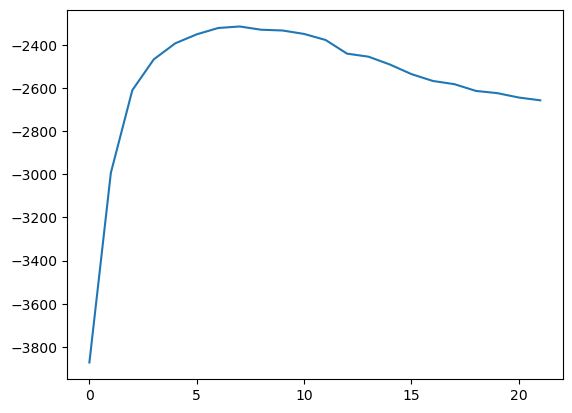

In [300]:
plt.plot(a)

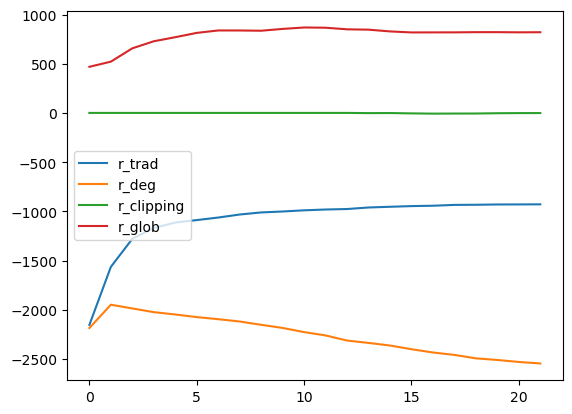

In [301]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [302]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

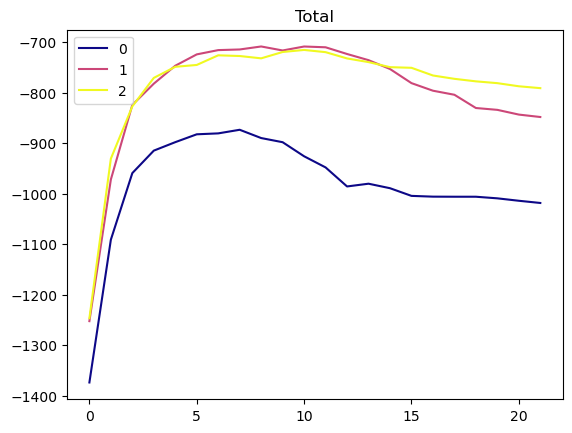

In [303]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Total')
    plt.legend()

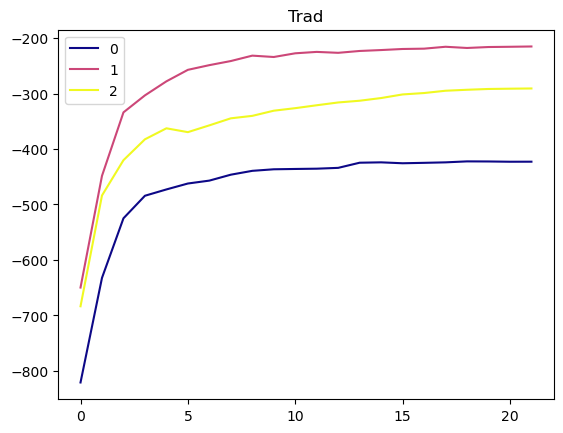

In [304]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

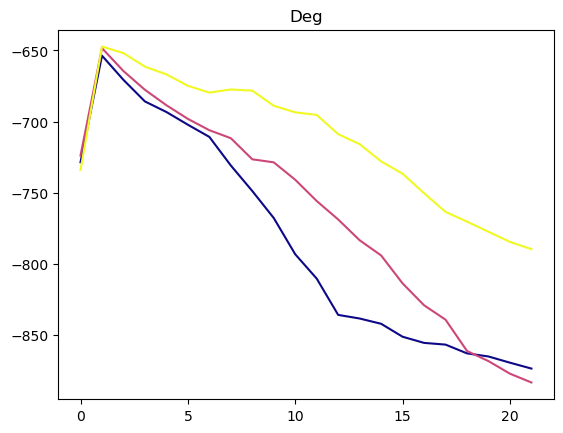

In [305]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

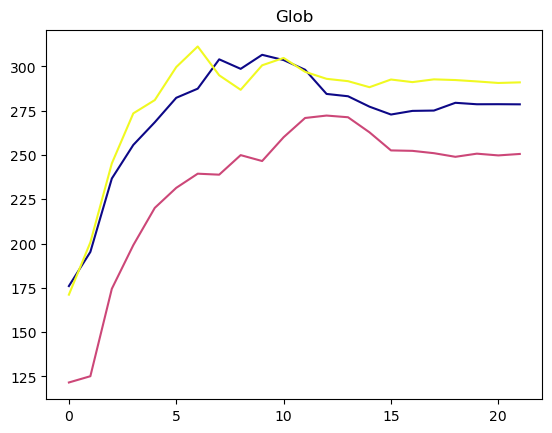

In [306]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')

In [307]:
val_info['self_consumption'].sum(axis=1)

array([5.0553870e+06, 5.6272405e+06, 7.1206090e+06, 7.9138325e+06,
       8.3566175e+06, 8.8318340e+06, 9.0966420e+06, 9.0867520e+06,
       9.0595380e+06, 9.2548310e+06, 9.4077750e+06, 9.3767090e+06,
       9.1910720e+06, 9.1595580e+06, 8.9605760e+06, 8.8400080e+06,
       8.8454780e+06, 8.8512370e+06, 8.8706030e+06, 8.8735440e+06,
       8.8534240e+06, 8.8655530e+06], dtype=float32)

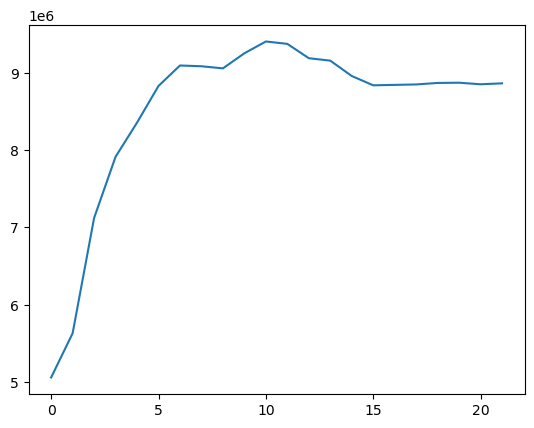

In [308]:
plt.plot(val_info['self_consumption'].sum(axis=1))

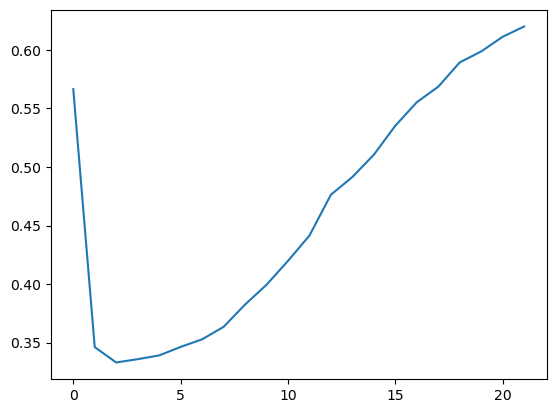

In [309]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [310]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43800)

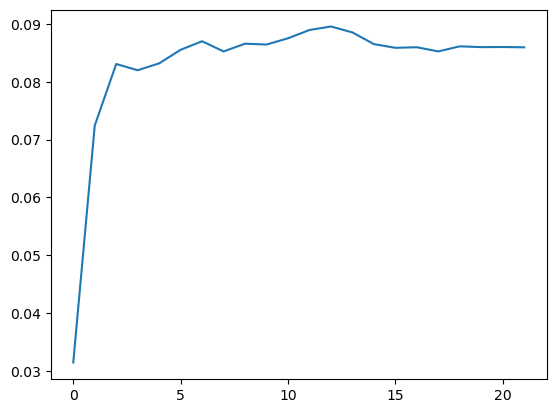

In [311]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

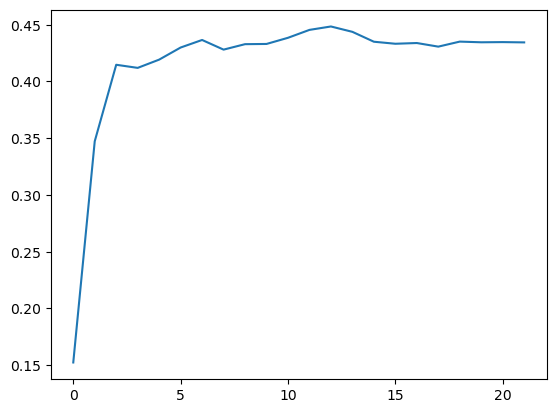

In [312]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))